# Capstone Capstone 2 -- EDA
### Online Retail II

<a id= 'libraries'></a>
**Import Libraries** 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

<a id='preferences'></a>
**Set Default Preferences**

In [43]:
# display all columns
pd.set_option('display.max_columns', None)

# surpress scientific notation
pd.options.display.float_format = '{:}'.format

<a id='data'></a>
**Import Data** 

In [44]:
# import

start = time.time()
file_path = '../Data/cleaned_data.csv'

data = pd.read_csv(file_path)
end = time.time()

print(f"Import time {round(end - start,3)} seconds")
data.head()

Import time 0.661 seconds


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.1,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [45]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Sales'],
      dtype='object')

**Re-import with correct formats**

In [46]:
dtype_dict = {'Invoice':'string',
              'StockCode':'string',
              'Description':'string',
              'Quantity':'int32',
              'Price':'float32',
              'Customer ID':'string',
              'Country':'string',
              'Sales':'float32'}

#re-import with correct dtype
start = time.time()
file_path = '../Data/cleaned_data.csv'

data = pd.read_csv(file_path, dtype=dtype_dict, parse_dates=['InvoiceDate'])
end = time.time()

print(f"Import time {round(end - start,3)} seconds")
data.info()

Import time 0.902 seconds
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041669 entries, 0 to 1041668
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1041669 non-null  string        
 1   StockCode    1041669 non-null  string        
 2   Description  1041669 non-null  string        
 3   Quantity     1041669 non-null  int32         
 4   InvoiceDate  1041669 non-null  datetime64[ns]
 5   Price        1041669 non-null  float32       
 6   Customer ID  805549 non-null   string        
 7   Country      1041669 non-null  string        
 8   Sales        1041669 non-null  float32       
dtypes: datetime64[ns](1), float32(2), int32(1), string(5)
memory usage: 59.6 MB


**Copy data in case something goes wrong**

In [47]:
df=data.copy(deep=True)

In [48]:
df.sample(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
33648,492290,21158,MOODY GIRL DOOR HANGER,24,2009-12-16 11:47:00,0.3799999952316284,14966.0,United Kingdom,9.119999885559082
1026872,580678,22647,CERAMIC LOVE HEART MONEY BANK,12,2011-12-05 14:49:00,0.38999998569488525,18015.0,United Kingdom,4.679999828338623
1033916,581130,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,2011-12-07 12:49:00,1.25,18237.0,United Kingdom,15.0
829292,565441,23188,VINTAGE 2 METER FOLDING RULER,1,2011-09-04 14:08:00,1.649999976158142,13240.0,United Kingdom,1.649999976158142
620073,545713,22076,6 RIBBONS EMPIRE,3,2011-03-07 10:11:00,2.4600000381469727,<NA>,United Kingdom,7.380000114440918
788185,561719,21080,SET/20 RED RETROSPOT PAPER NAPKINS,96,2011-07-29 12:09:00,0.7200000286102295,17519.0,United Kingdom,69.12000274658203
919995,572704,21155,RED RETROSPOT PEG BAG,4,2011-10-25 14:39:00,4.960000038146973,<NA>,United Kingdom,19.84000015258789
1040291,581492,46776F,WOVEN ROSE GARDEN CUSHION COVER,6,2011-12-09 10:03:00,4.130000114440918,<NA>,United Kingdom,24.780000686645508
469448,534640,21175,GIN + TONIC DIET METAL SIGN,24,2010-11-23 13:02:00,2.0999999046325684,13089.0,United Kingdom,50.400001525878906
941705,574532,23370,SET 36 COLOURING PENCILS DOILY,16,2011-11-04 14:19:00,1.25,15676.0,United Kingdom,20.0


## Inspect the Data  and Additional Cleaning

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041669 entries, 0 to 1041668
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1041669 non-null  string        
 1   StockCode    1041669 non-null  string        
 2   Description  1041669 non-null  string        
 3   Quantity     1041669 non-null  int32         
 4   InvoiceDate  1041669 non-null  datetime64[ns]
 5   Price        1041669 non-null  float32       
 6   Customer ID  805549 non-null   string        
 7   Country      1041669 non-null  string        
 8   Sales        1041669 non-null  float32       
dtypes: datetime64[ns](1), float32(2), int32(1), string(5)
memory usage: 59.6 MB


### Duplicates <a id='duplicates'></a>
* 33757 duplicated rows dropped

In [50]:
len(df)==len(df.drop_duplicates())

False

In [51]:
len(df[df.duplicated(keep='first')])  # 33757 duplicated rows

33757

In [52]:
df[df.duplicated(keep=False)].sample(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
987129,577740,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2011-11-21 13:36:00,4.949999809265137,17625.0,United Kingdom,4.949999809265137
1004498,578944,23191,BUNDLE OF 3 RETRO NOTE BOOKS,1,2011-11-27 13:41:00,1.649999976158142,16005.0,United Kingdom,1.649999976158142
523358,537354,22356,CHARLOTTE BAG PINK POLKADOT,2,2010-12-06 12:23:00,0.8500000238418579,12748.0,United Kingdom,1.7000000476837158
517304,536876,22324,BLUE POLKADOT KIDS BAG,1,2010-12-03 11:36:00,4.210000038146973,<NA>,United Kingdom,4.210000038146973
498400,537160,22296,HEART IVORY TRELLIS LARGE,8,2010-12-05 13:18:00,1.649999976158142,14161.0,United Kingdom,13.199999809265137


In [53]:
#sampling of duplicates to ensure complete duplication before dropping
#df[(df.Invoice=='489517')&(df.StockCode=='21913')]
#df[(df.Invoice=='581538')&(df.StockCode=='22694')]
df[(df.Invoice=='538155')&(df.StockCode=='21165')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
511282,538155,21165,BEWARE OF THE CAT METAL SIGN,1,2010-12-09 16:52:00,1.690000057220459,16907.0,United Kingdom,1.690000057220459
533298,538155,21165,BEWARE OF THE CAT METAL SIGN,1,2010-12-09 16:52:00,1.690000057220459,16907.0,United Kingdom,1.690000057220459


In [54]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [55]:
#ensure it kept only first occurance
df[(df.Invoice=='538155')&(df.StockCode=='21165')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales
511282,538155,21165,BEWARE OF THE CAT METAL SIGN,1,2010-12-09 16:52:00,1.690000057220459,16907.0,United Kingdom,1.690000057220459


### Known Customers <a id='known'></a>
* The purpose of this porject is to identify customer segments.  to do that we have to focus on the known customers with Values in the 'Customer ID' column.
<br><br>
* Unknown customers represent approximately 7.8% of all invoices and 15.1% of sales

In [56]:
#create df for customers with and without 'Customer ID' 
no_id = df[df['Customer ID'].isna()==True].copy()
has_id = df[df['Customer ID'].isna()==False].copy()

In [57]:
# Percent of sales
no_id.Sales.sum()/df.Sales.sum()

0.15100734

In [58]:
# percent of invoices
no_id.Invoice.nunique()/df.Invoice.nunique()

0.07752769737498752

In [59]:
# known customer unique transcation
has_id.Invoice.nunique()

36969

Known customers had 36,969 transactions over the sales data

In [60]:
has_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779425 entries, 0 to 1041668
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  string        
 1   StockCode    779425 non-null  string        
 2   Description  779425 non-null  string        
 3   Quantity     779425 non-null  int32         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float32       
 6   Customer ID  779425 non-null  string        
 7   Country      779425 non-null  string        
 8   Sales        779425 non-null  float32       
dtypes: datetime64[ns](1), float32(2), int32(1), string(5)
memory usage: 50.5 MB


## Summary Stats

In [61]:
#describe 
has_id.describe()

,Quantity,InvoiceDate,Price,Sales
count,779425.0,779425,779425.0,779425.0
mean,13.489369727683869,2011-01-03 01:44:42.593475584,3.2184879779815674,22.29182243347168
min,1.0,2009-12-01 07:45:00,0.0010000000474974513,0.0010000000474974513
25%,2.0,2010-07-02 14:39:00,1.25,4.949999809265137
50%,6.0,2010-12-02 14:09:00,1.9500000476837158,12.479999542236328
75%,12.0,2011-08-01 13:44:00,3.75,19.799999237060547
max,80995.0,2011-12-09 12:50:00,10953.5,168469.59375
std,145.85581409954753,NaN,29.624326705932617,227.24818420410156


In [62]:
has_id.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Sales'],
      dtype='object')

#### Quantity
* There were 779425 individual line items in the dataset with 95% selling 36 or less in any given transaction.  
* There were only 9812 times when a single item sold more than 100 Quantiy in any given transaction.

In [63]:
has_id.Quantity.describe([.25, .5, .75, .95, .99])

count             779425.0
mean    13.489369727683869
std     145.85581409954753
min                    1.0
25%                    2.0
50%                    6.0
75%                   12.0
95%                   36.0
99%                  144.0
max                80995.0
Name: Quantity, dtype: float64

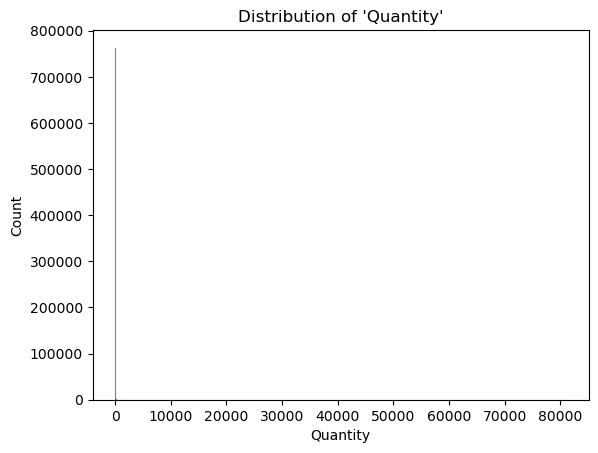

In [64]:
sns.histplot(has_id.Quantity, bins=int(np.sqrt(len(has_id))))
plt.title("Distribution of 'Quantity'")
plt.show()

accidental side quest: identify customers who have purchased large quantity of single items (100+) multiple times
* 16.5% of customers have purchase 100+ items in any given transaction 

In [65]:
has_id[has_id.Quantity>100]['Quantity'].count()

9812

In [66]:
has_id[has_id.Quantity>100]['Quantity'].count()/len(has_id)

0.012588767360554256

In [67]:
#possible wholesale customers - repeat purchases of 100 unites or more for any single item
has_id[has_id.Quantity > 100].groupby('Customer ID')['Quantity'].count().sort_values(ascending=False)


Customer ID
14646.0    1088
18102.0     609
13694.0     569
14156.0     430
16684.0     303
           ... 
15187.0       1
15195.0       1
15210.0       1
15241.0       1
18279.0       1
Name: Quantity, Length: 967, dtype: int64

In [68]:
967/has_id['Customer ID'].nunique()

0.1645117386866281

In [69]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Sales'],
      dtype='object')

#### StockCode - Top Ten Items sold
Note: there are 4631 unique items which is why ther is not visual representation of their distribution
* broken down my most common decription and by count of each individual description

In [70]:
has_id.StockCode.nunique()

4631

In [71]:
has_id.groupby('StockCode')['Quantity'].sum().nlargest(10)

StockCode
84077     105185
85099B     93436
85123A     91814
21212      89850
23843      80995
84879      78234
23166      77916
22197      76944
17003      70082
21977      54592
Name: Quantity, dtype: int32

In [72]:
# Step 1: Find the top 10 StockCodes based on total Quantity
top_10_stockcodes = has_id.groupby('StockCode')['Quantity'].sum().nlargest(10)

# Step 2: Retrieve the most common Description for each of the top StockCodes
most_common_descriptions = (
    has_id[has_id['StockCode'].isin(top_10_stockcodes.index)]
    .groupby('StockCode')['Description']
    .agg(lambda x: x.value_counts().idxmax())
)

# Step 3: Combine Quantity and the most common Description
result = (
    top_10_stockcodes
    .to_frame('TotalQuantity')
    .merge(most_common_descriptions.to_frame('MostCommonDescription'), left_index=True, right_index=True)
    .sort_values(by='TotalQuantity', ascending=False)
)

print(result)


           TotalQuantity               MostCommonDescription
StockCode                                                   
84077             105185   WORLD WAR 2 GLIDERS ASSTD DESIGNS
85099B             93436             JUMBO BAG RED RETROSPOT
85123A             91814  WHITE HANGING HEART T-LIGHT HOLDER
21212              89850     PACK OF 72 RETROSPOT CAKE CASES
23843              80995         PAPER CRAFT , LITTLE BIRDIE
84879              78234       ASSORTED COLOUR BIRD ORNAMENT
23166              77916      MEDIUM CERAMIC TOP STORAGE JAR
22197              76944                SMALL POPCORN HOLDER
17003              70082                 BROCADE RING PURSE 
21977              54592  PACK OF 60 PINK PAISLEY CAKE CASES


In [73]:
# Step 1: Find the top 10 StockCodes based on total Quantity
top_10_stockcodes = has_id.groupby('StockCode')['Quantity'].sum().nlargest(10).reset_index()

# Step 2: Filter the original DataFrame to include only the top 10 StockCodes
top_10_descriptions = has_id[has_id['StockCode'].isin(top_10_stockcodes['StockCode'])][['StockCode', 'Description']].drop_duplicates()

# Step 3: Sort the results by StockCode
top_10_descriptions_sorted = top_10_descriptions.sort_values(by='StockCode')

print(top_10_descriptions_sorted)


        StockCode                         Description
2829        17003                 BROCADE RING PURSE 
224         21212    PACK OF 72 RETRO SPOT CAKE CASES
342985      21212     PACK OF 72 RETROSPOT CAKE CASES
188         21977  PACK OF 60 PINK PAISLEY CAKE CASES
517         22197             POPCORN HOLDER , SMALL 
98252       22197                SMALL POPCORN HOLDER
729368      22197                      POPCORN HOLDER
571815      23166      MEDIUM CERAMIC TOP STORAGE JAR
1040187     23843         PAPER CRAFT , LITTLE BIRDIE
1256        84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS
15          84879       ASSORTED COLOUR BIRD ORNAMENT
161        85099B         JUMBO BAG RED WHITE SPOTTY 
143933     85099B            RED RETROSPOT JUMBO BAG 
192045     85099B             JUMBO BAG RED RETROSPOT
102        85123A  WHITE HANGING HEART T-LIGHT HOLDER
1037427    85123A  CREAM HANGING HEART T-LIGHT HOLDER


#### InvoiceDate
* number of orders ('Invoice') is pretty consistent over the spring and summer months of March to August but increase in the ramp up to the three months before the December holiday season and then there is a dip in the two months after the holidays.  
* Total 'MonthlySales' show similar trends.
* Note: Sales for December 2011 do not represent a full month as the last InvoiceDate in the dataset was December 9 2011

In [74]:
has_id['YearMonth'] = has_id['InvoiceDate'].dt.to_period('M')

# Count invoices per month
invoices_per_month = has_id.groupby('YearMonth')['Invoice'].nunique()

# Convert to DataFrame for easier visualization
invoices_per_month = invoices_per_month.reset_index()
invoices_per_month.columns = ['YearMonth', 'InvoiceCount']

# Display the result
print(invoices_per_month)

   YearMonth  InvoiceCount
0    2009-12          1512
1    2010-01          1011
2    2010-02          1104
3    2010-03          1524
4    2010-04          1329
5    2010-05          1377
6    2010-06          1497
7    2010-07          1381
8    2010-08          1293
9    2010-09          1689
10   2010-10          2133
11   2010-11          2587
12   2010-12          1400
13   2011-01           987
14   2011-02           997
15   2011-03          1321
16   2011-04          1149
17   2011-05          1555
18   2011-06          1393
19   2011-07          1331
20   2011-08          1280
21   2011-09          1755
22   2011-10          1929
23   2011-11          2657
24   2011-12           778


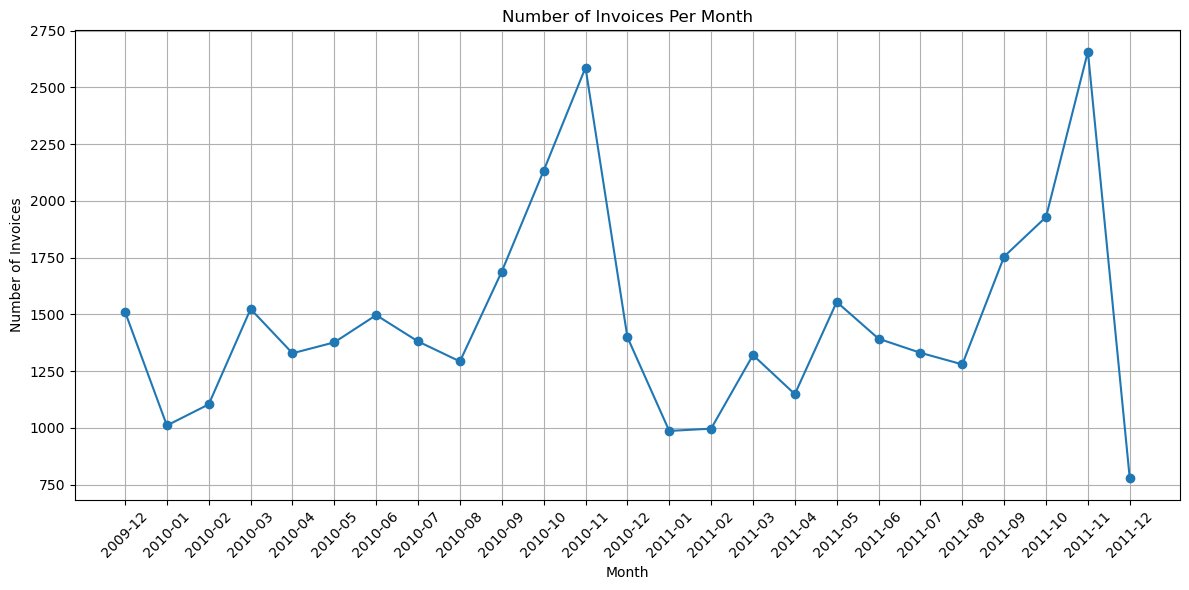

In [75]:

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(invoices_per_month['YearMonth'].astype(str), invoices_per_month['InvoiceCount'], marker='o')
plt.title("Number of Invoices Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Invoices")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
# Count sales per month
sales_per_month = has_id.groupby('YearMonth')['Sales'].sum()

# Convert to DataFrame for easier visualization
sales_per_month = sales_per_month.reset_index()
sales_per_month.columns = ['YearMonth', 'MonthlySales']

# Display the result
print(sales_per_month)

   YearMonth  MonthlySales
0    2009-12      683504.0
1    2010-01   555802.6875
2    2010-02  504558.96875
3    2010-03      696978.5
4    2010-04      591982.0
5    2010-05    597833.375
6    2010-06    636371.125
7    2010-07   589736.1875
8    2010-08    602224.625
9    2010-09   829013.9375
10   2010-10     1033112.0
11   2010-11     1166460.0
12   2010-12     570422.75
13   2011-01   568101.3125
14   2011-02  446084.90625
15   2011-03     594081.75
16   2011-04  468374.34375
17   2011-05    677355.125
18   2011-06   660046.0625
19   2011-07    598962.875
20   2011-08   644051.0625
21   2011-09   950690.1875
22   2011-10  1035642.4375
23   2011-11   1156205.625
24   2011-12   517208.4375


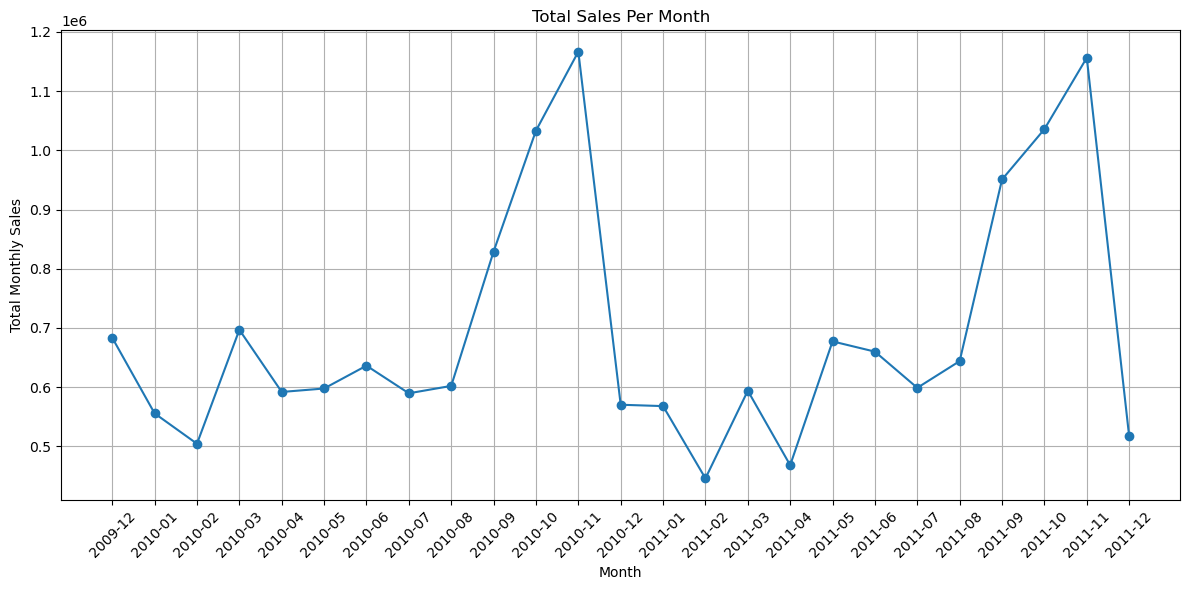

In [77]:
# Line plot
plt.figure(figsize=(12, 6))
plt.plot(sales_per_month['YearMonth'].astype(str), sales_per_month['MonthlySales'], marker='o')
plt.title("Total Sales Per Month")
plt.xlabel("Month")
plt.ylabel("Total Monthly Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
has_id.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [79]:
has_id.InvoiceDate.min()

Timestamp('2009-12-01 07:45:00')

#### Price
* Median price for any given item is 1.95 with a mean price of 3.22

In [80]:
has_id.Price.describe([.25,.5,.75,.95,.99]).round(2)

count   779425.0
mean        3.22
std        29.62
min          0.0
25%         1.25
50%         1.95
75%         3.75
95%          8.5
99%        14.95
max      10953.5
Name: Price, dtype: float64

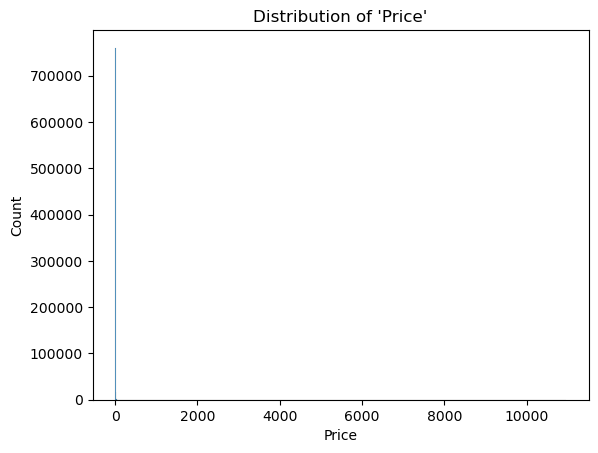

In [81]:
sns.histplot(has_id.Price, bins=int(np.sqrt(len(has_id))))
plt.title("Distribution of 'Price'")
plt.show()

In [84]:
# top items based on price
top_items_by_price = has_id[['StockCode', 'Description', 'Price']].drop_duplicates()
top_items_by_price = top_items_by_price.nlargest(25, 'Price')

print(top_items_by_price)


        StockCode     Description              Price
130893          M          Manual            10953.5
348321          M          Manual   10468.7998046875
72226           M          Manual     8985.599609375
680662       POST         POSTAGE            8142.75
125938          M          Manual     6958.169921875
923997          M          Manual   4161.06005859375
908368          M          Manual  3949.320068359375
280026          M          Manual             3610.5
877473          M          Manual  3155.949951171875
348351          M          Manual   2769.89990234375
407137          M          Manual  2736.159912109375
382869          M          Manual    2667.8798828125
363800          M          Manual   2545.85009765625
801899          M          Manual             2500.0
652929          M          Manual     2382.919921875
383026          M          Manual     2225.169921875
908369          M          Manual  2118.739990234375
652932          M          Manual  2053.070068

Explore 'Manual' 
* Manual entries are mixed.  from a small sample of entries explores it appears the lower prices manual entries are often single lines or included in other invoices.  The Larger priced manual entries are single lines possibly representing entire orders.  There is no clarity in either case as the 'Description' is only 'Manual'.
* The company is based in the UK  with aproximatey 90% of their orders from the UK but only 39% of manual orders are from the UK. 

In [85]:
manual = has_id[has_id.StockCode=='M'] # 681 rows
# manual[manual.Price>14.95] # returns 164 rows -- 99% are below 14.95
# manual[manual.Price>100] # returns 113 rows
manual[manual.Price>500] # returns 36 rows

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,YearMonth
22350,491176,M,Manual,1,2009-12-10 11:50:00,1213.02001953125,13091.0,United Kingdom,1213.02001953125,2009-12
38029,492650,M,Manual,1,2009-12-17 17:43:00,803.25,14911.0,EIRE,803.25,2009-12
46877,493897,M,Manual,1,2010-01-08 10:39:00,780.52001953125,14911.0,EIRE,780.52001953125,2010-01
46905,493900,M,Manual,1,2010-01-08 10:44:00,780.52001953125,14911.0,EIRE,780.52001953125,2010-01
50033,494042,M,Manual,1,2010-01-11 11:57:00,975.1099853515625,12510.0,Spain,975.1099853515625,2010-01
...,...,...,...,...,...,...,...,...,...,...
908369,571751,M,Manual,1,2011-10-19 11:18:00,2118.739990234375,12744.0,Singapore,2118.739990234375,2011-10
923997,573077,M,Manual,1,2011-10-27 14:13:00,4161.06005859375,12536.0,France,4161.06005859375,2011-10
923998,573080,M,Manual,1,2011-10-27 14:20:00,4161.06005859375,12536.0,France,4161.06005859375,2011-10
956684,575632,M,Manual,1,2011-11-10 13:44:00,549.3400268554688,12473.0,Germany,549.3400268554688,2011-11


In [86]:
has_id.Country.value_counts(normalize=True).head()

Country
United Kingdom     0.8985957596946467
Germany          0.021082208037976714
EIRE              0.01996984956859223
France           0.017334573563845143
Netherlands      0.006524040157808641
Name: proportion, dtype: Float64

In [87]:
manual['Country'].value_counts(normalize=True).round(2) # .39 in UK
# manual[manual.Price>14.95]['Country'].value_counts(normalize=True).round(2) # .55 in UK
# manual[manual.Price>50]['Country'].value_counts(normalize=True).round(2) # .48 in UK
# manual[manual.Price>100]['Country'].value_counts(normalize=True).round(2) # .42 in UK
# manual[manual.Price>300]['Country'].value_counts(normalize=True).round(2) # .38 in UK
# manual[manual.Price>500]['Country'].value_counts(normalize=True).round(2)  # .34 in UK
# manual[manual.Price>750]['Country'].value_counts(normalize=True).round(2)  # .37 in UK
manual[manual.Price>1000]['Country'].value_counts(normalize=True).round(2)  # .39 in UK
# manual[manual.Price>2000]['Country'].value_counts(normalize=True).round(2)  # .45 in UK

Country
United Kingdom   0.39
EIRE             0.17
France           0.14
Singapore        0.14
Norway           0.06
Portugal         0.06
Belgium          0.03
Malta            0.03
Name: proportion, dtype: Float64

In [88]:
# has_id[has_id.Invoice == '492650']
# has_id[has_id.Invoice == '490300'].head(40)
# has_id[has_id.Invoice == '490760']
has_id[has_id.Invoice == '573077']
# has_id[has_id.Invoice == '491176']
# has_id[has_id.Invoice == '576389']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,YearMonth
923997,573077,M,Manual,1,2011-10-27 14:13:00,4161.06005859375,12536.0,France,4161.06005859375,2011-10


In [89]:
has_id.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Sales', 'YearMonth'],
      dtype='object')

#### Customer ID
* Top ten customers ar listed.  
* The top 5 customers make 11.3% of all Sales
* Top five customers range from 51 unique invoices to 398 unique invoices

In [90]:
#Top ten customers by total sales
customer_sales = has_id.groupby('Customer ID')['Sales'].sum().round(2)
customer_sales.sort_values(ascending=False).head(10)

Customer ID
18102.0     580987.0625
14646.0        528602.5
14156.0      313437.625
14911.0     291420.8125
17450.0   244784.234375
13694.0     195640.6875
17511.0      172132.875
16446.0        168472.5
16684.0   147142.765625
12415.0      144458.375
Name: Sales, dtype: float32

In [91]:
#percent of sales each of top 10 represents
customer_sales_percent = customer_sales/customer_sales.sum()*100
customer_sales_percent.sort_values(ascending=False).head(10)

Customer ID
18102.0     3.34384822845459
14646.0    3.042351007461548
14156.0   1.8039779663085938
14911.0   1.6772608757019043
17450.0   1.4088460206985474
13694.0   1.1260021924972534
17511.0   0.9907039999961853
16446.0   0.9696367979049683
16684.0   0.8468744158744812
12415.0   0.8314244747161865
Name: Sales, dtype: float32

In [92]:
# percent of sales from top 5 customers
3.34384822845459+3.042351007461548+1.8039779663085938+1.6772608757019043+1.4088460206985474 

11.276284098625183

In [93]:
# has_id[has_id['Customer ID']=='18102.0']['Invoice'].nunique() # 145 unique invoices
# has_id[has_id['Customer ID']=='14646.0']['Invoice'].nunique()  # 151 unique invoices
# has_id[has_id['Customer ID']=='14156.0']['Invoice'].nunique()  # 156 unique invoices
# has_id[has_id['Customer ID']=='14911.0']['Invoice'].nunique()  # 398 unique invoices
has_id[has_id['Customer ID']=='17450.0']['Invoice'].nunique()  # 51 unique invoices

51

#### Country
* UK represents 82% of Sales with the Republic of Ireland, Netherlands, Germany, and France rounding out the top five countries by Sales

In [94]:
# Top countries by Sales
country_sales = has_id.groupby('Country')['Sales'].sum()
country_sales_percent = country_sales/country_sales.sum()
country_sales_percent.nlargest(10)

Country
United Kingdom      0.8281667232513428
EIRE               0.03548647463321686
Netherlands       0.031887441873550415
Germany           0.024461843073368073
France            0.020073261111974716
Australia         0.009743042290210724
Spain             0.006235033739358187
Switzerland      0.0057590254582464695
Sweden            0.005267157219350338
Denmark           0.003947134595364332
Name: Sales, dtype: float32

In [95]:
# top countries by line items sold
has_id.Country.value_counts(normalize=True).head(7).round(5)

Country
United Kingdom    0.8986
Germany          0.02108
EIRE             0.01997
France           0.01733
Netherlands      0.00652
Spain             0.0047
Belgium          0.00392
Name: proportion, dtype: Float64

## Summary Stats - aggregated by 'Invoice'

### 'StockCode' / 'Description'
Note: This analysis will focus on 'StockCode' instead of 'Description' as previous analysis showed that 'Description' for multiple items has changed over time but the 'StockCode' has stayed the same.
* The distribution of unique 'StockCode' per 'Invoice' is skewed right.
* Average number of unique 'StockCode' per 'Invoice' is 20.8 with a Median number of 15
* approximately 5.5% of 'Invoice' are considered outliers by the number of unique 'StockCode'

In [96]:
# StockCode: Sumary Stats for known customers
has_id_stock = has_id.groupby('Invoice')['StockCode'].nunique()
has_id_stock.describe() 

count             36969.0
mean    20.79756011793665
std     22.39987275392407
min                   1.0
25%                   6.0
50%                  15.0
75%                  27.0
max                 541.0
Name: StockCode, dtype: float64

Text(0.5, 1.0, "Distribution of unique 'StockCode' per 'Invoice'")

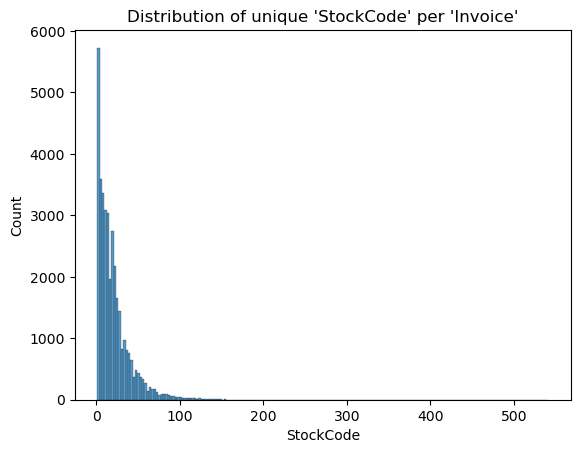

In [97]:
sns.histplot(has_id_stock, bins=int(np.sqrt(len(has_id_stock))))
plt.title("Distribution of unique 'StockCode' per 'Invoice'")


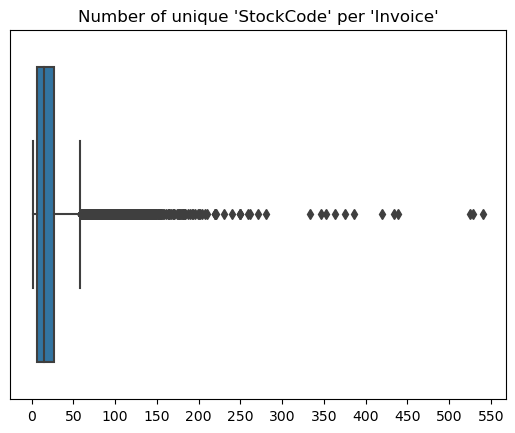

In [98]:
sns.boxplot(has_id_stock, orient='h')
plt.title("Number of unique 'StockCode' per 'Invoice'")

plt.yticks([])
plt. xticks(list(range(0,575, 50)))
plt.show()

In [99]:
has_id_stock.describe([.25, .5, .75, .95,.997])

count             36969.0
mean    20.79756011793665
std     22.39987275392407
min                   1.0
25%                   6.0
50%                  15.0
75%                  27.0
95%                  61.0
99.7%               136.0
max                 541.0
Name: StockCode, dtype: float64

In [100]:
# percent of 'Invoice' with less than 100 
len(has_id_stock[has_id_stock<=100])/len(has_id_stock)

0.9895317698612351

In [101]:
# number of outliers -- Approximately 5.5% of invoices
top = has_id_stock.quantile(.75)+(1.5*(has_id_stock.quantile(.75)-has_id_stock.quantile(.25)))
#58.5
outliers = has_id_stock[has_id_stock> top].count()
#2045
outliers/len(has_id_stock)

0.05531661662473965

#### 'Quantity'

This represents the total number of items purchased per 'Invoice'
* The distribution of 'Quantity' per 'Invoice' is highly skewed right
* Average 'Quantity' purchased per 'Invoice' is 284.4 with a Median number of 151
* approximately 7.4% of 'Invoice' are considered outliers by the 'Quantity' purchased.

In [102]:
has_id_quantity = has_id.groupby('Invoice')['Quantity'].sum()
has_id_quantity.describe()

count              36969.0
mean     284.3991452297871
std     1232.3822594853275
min                    1.0
25%                   72.0
50%                  151.0
75%                  287.0
max                87167.0
Name: Quantity, dtype: float64

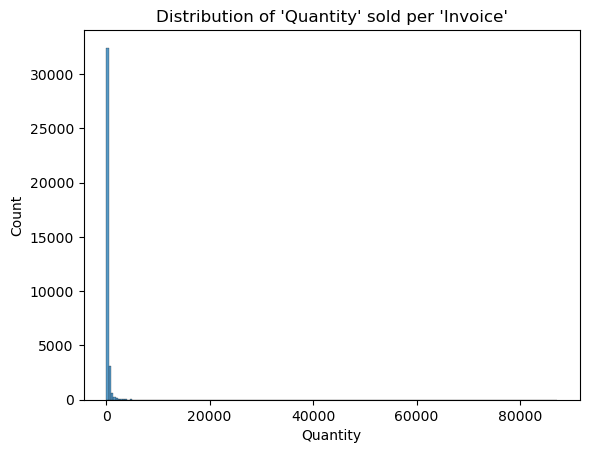

In [103]:
sns.histplot(has_id_quantity, bins=int(np.sqrt(len(has_id_quantity))))
plt.title("Distribution of 'Quantity' sold per 'Invoice'")
plt.show()

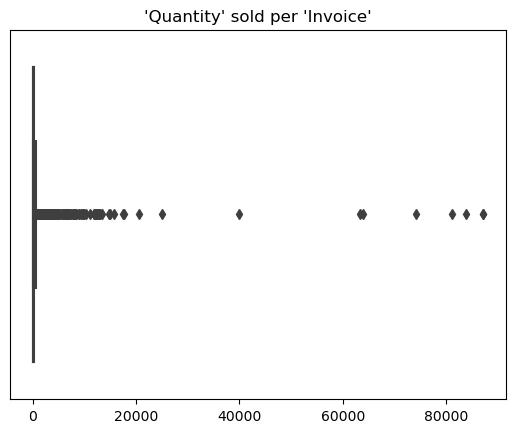

In [104]:
sns.boxplot(has_id_quantity, orient='h')
plt.title("'Quantity' sold per 'Invoice'")

plt.yticks([])
plt.show()

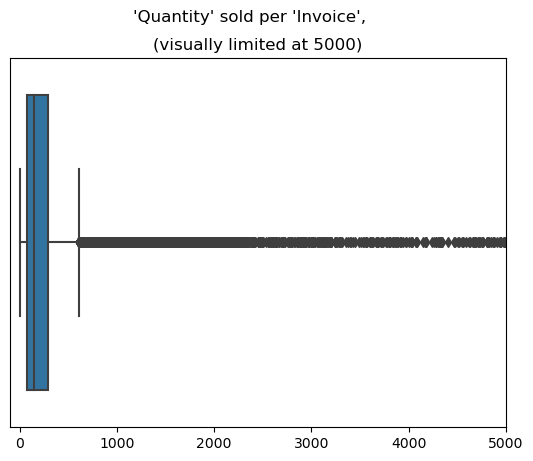

In [105]:
sns.boxplot(has_id_quantity, orient='h')
plt.suptitle("'Quantity' sold per 'Invoice',")
plt.title('(visually limited at 5000)')
plt.xlim(-100,5000)
plt.yticks([])
plt.show()

In [106]:
# number of outliers -- Approximately 7.4% of invoices
top = has_id_quantity.quantile(.75)+(1.5*(has_id_quantity.quantile(.75)-has_id_quantity.quantile(.25)))
#top = 609.5
outliers = has_id_quantity[has_id_quantity> top].count()
#outliers = 2745
outliers/len(has_id_quantity)

0.07425139982147204

In [107]:
has_id_quantity.describe([.25, .5, .75, .95,.997])

count              36969.0
mean     284.3991452297871
std     1232.3822594853275
min                    1.0
25%                   72.0
50%                  151.0
75%                  287.0
95%                  776.0
99.7%               4752.0
max                87167.0
Name: Quantity, dtype: float64

#### 'Sales'

This represents the total 'Sales' amount per 'Invoice'
* The distribution of 'Sales' per 'Invoice' is highly skewed right
* Average 'Sales' per 'Invoice' is 469.98 with a Median number of 303.04
* approximately 7.8% of 'Invoice' are considered outliers by the 'Sales'.

In [108]:
# Sales: Summary Stats for known customers
has_id_sales = has_id.groupby('Invoice')['Sales'].sum()
has_id_sales.describe().round(2)

count     36969.0
mean       469.98
std       1359.74
min          0.38
25%        157.92
50%        303.04
75%        477.28
max     168469.59
Name: Sales, dtype: float64

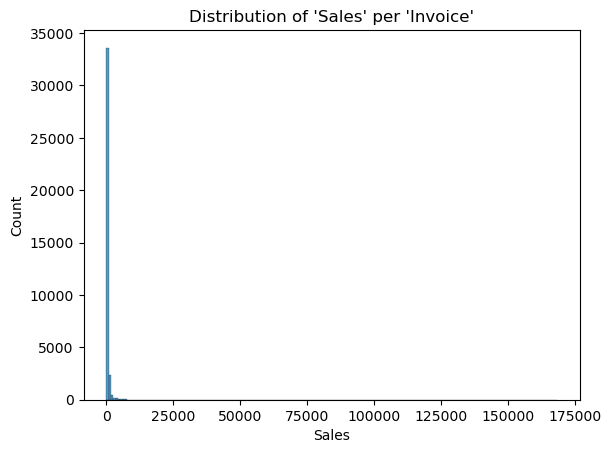

In [109]:
sns.histplot(has_id_sales, bins=int(np.sqrt(len(has_id_sales))))
plt.title("Distribution of 'Sales' per 'Invoice'")
plt.show()

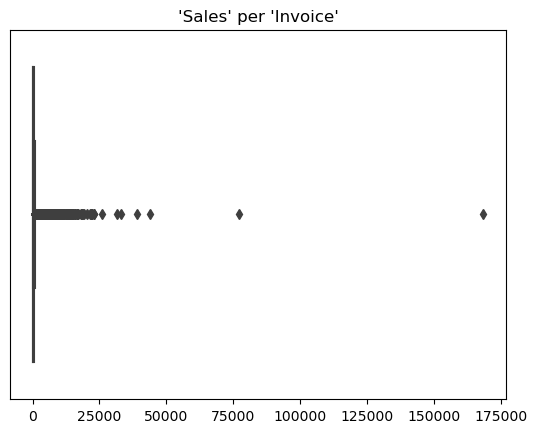

In [110]:
sns.boxplot(has_id_sales, orient='h')
plt.title("'Sales' per 'Invoice'")

plt.yticks([])
plt.show()

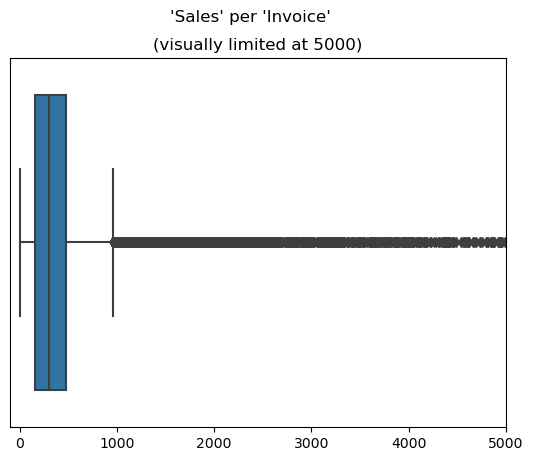

In [111]:
sns.boxplot(has_id_sales, orient= 'h')
plt.suptitle("'Sales' per 'Invoice'")
plt.title('(visually limited at 5000)')
plt.xlim(-100,5000)

plt.yticks([])
plt.show()

In [112]:
# number of outliers -- Approximately 7.9% of invoices
top = has_id_sales.quantile(.75)+(1.5*(has_id_sales.quantile(.75)-has_id_sales.quantile(.25)))
# #top = 956.32
outliers = has_id_sales[has_id_sales> top].count()
# #outliers = 2907
outliers/len(has_id_sales)

0.07863344964700154

In [113]:
has_id_sales.describe([.25, .5, .75, .95,.997])

count              36969.0
mean     469.9830627441406
std     1359.7381591796875
min     0.3799999952316284
25%      157.9199981689453
50%      303.0400085449219
75%      477.2799987792969
95%      1230.990014648437
99.7%    7551.333484374848
max           168469.59375
Name: Sales, dtype: float64

In [114]:
has_id.describe()

,Quantity,InvoiceDate,Price,Sales
count,779425.0,779425,779425.0,779425.0
mean,13.489369727683869,2011-01-03 01:44:42.593475584,3.2184879779815674,22.29182243347168
min,1.0,2009-12-01 07:45:00,0.0010000000474974513,0.0010000000474974513
25%,2.0,2010-07-02 14:39:00,1.25,4.949999809265137
50%,6.0,2010-12-02 14:09:00,1.9500000476837158,12.479999542236328
75%,12.0,2011-08-01 13:44:00,3.75,19.799999237060547
max,80995.0,2011-12-09 12:50:00,10953.5,168469.59375
std,145.85581409954753,NaN,29.624326705932617,227.24818420410156


#### 'Price'

There are known outliers in the dataset that skew the distribution of 'Price' right.  So the 'Price' explored is the median 'Price' of items sold per 'Invoice'.

* The distribution of median 'Price' per 'Invoice' is highly skewed right
* Average of the median 'Price' per 'Invoice' is 7.09 with a Median of 2.03
* Approximately 8.5% of 'Invoice' are considered outliers by the median 'Price'

In [115]:
# Price: range of prices for items sold in each 'Invoice'
has_id_price = has_id.groupby('Invoice')['Price'].agg(['mean','min', 'median', 'max'])

has_id_price.describe().round(2)

# use median due to skew

,mean,min,median,max
count,36969.0,36969.0,36969.0,36969.0
mean,7.84,5.51,7.09,15.27
std,131.68,131.12,131.65,134.55
min,0.06,0.0,0.06,0.06
25%,2.06,0.42,1.55,4.95
50%,2.86,0.55,2.03,8.5
75%,3.98,1.25,2.95,12.75
max,10953.5,10953.5,10953.5,10953.5


In [116]:
# Sales: Summary Stats for known customers
has_id_price_med = has_id.groupby('Invoice')['Price'].median()
has_id_price_med.describe().round(2)

count   36969.0
mean       7.09
std      131.65
min        0.06
25%        1.55
50%        2.03
75%        2.95
max     10953.5
Name: Price, dtype: float64

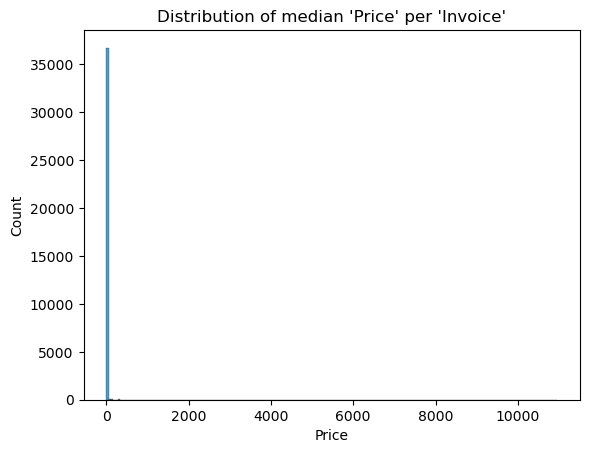

In [117]:
sns.histplot(has_id_price_med, bins=int(np.sqrt(len(has_id_price_med))))
plt.title("Distribution of median 'Price' per 'Invoice'")
plt.show()

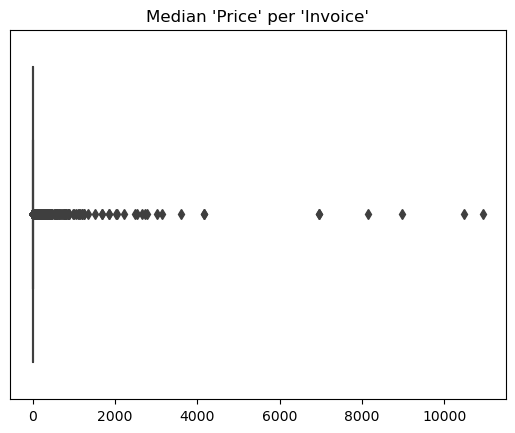

In [118]:
sns.boxplot(has_id_price_med, orient='h')
plt.title("Median 'Price' per 'Invoice'")

plt.yticks([])
plt.show()

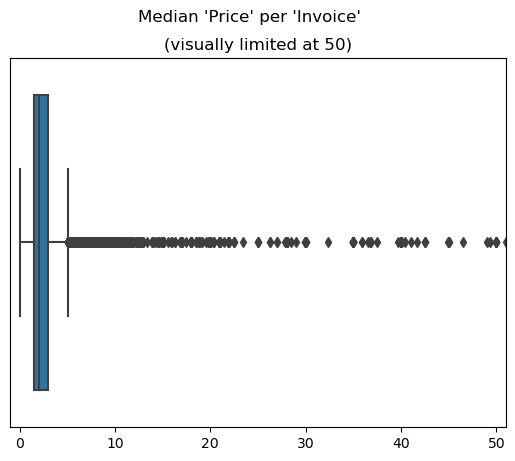

In [119]:
sns.boxplot(has_id_price_med, orient= 'h')
plt.suptitle("Median 'Price' per 'Invoice'")
plt.title('(visually limited at 50)')
plt.xlim(-1,51)

plt.yticks([])
plt.show()

In [120]:
# number of outliers -- Approximately 8.5% of invoices
top = has_id_price_med.quantile(.75)+(1.5*(has_id_price_med.quantile(.75)-has_id_price_med.quantile(.25)))
#top = 5.05
outliers = has_id_price_med[has_id_price_med> top].count()
#num of outliers = 3149
outliers/len(has_id_price_med)

0.08517947469501475

In [121]:
has_id_price_med.describe([.25, .5, .75, .95,.997])

count               36969.0
mean      7.094405174255371
std      131.65347290039062
min     0.05999999865889549
25%      1.5499999523162842
50%      2.0250000953674316
75%       2.950000047683716
95%                    6.75
99.7%    274.33441162109057
max                 10953.5
Name: Price, dtype: float64

#### Grouped Dataframe
grouped_df will be created to collect above aggregated data that was grouped by 'Invoice' number.  'Description' will be excluded from the grouped_df because several 'StockCode' have multiple descriptions.
<br><br>
* Invoice: 'Invoice'
* StockCode: nunique stock code per 'Invoice'
* Quantity: total quantity of units sold per 'Invoice'
* InvoiceDate: 'InvoiceDate'
* Price: median 'Price' per 'Invoice'
* Customer ID: 'Customer ID'
* Country: 'Country'
* Sales: total 'Sales' per 'Invoice'

In [122]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Sales'],
      dtype='object')

In [123]:
grouped_df = pd.DataFrame({'Invoice': has_id.groupby('Invoice')['Invoice'].first(),
                           'StockCode': has_id_stock,
                           'Quantity': has_id_quantity,
                           'InvoiceDate': has_id.groupby('Invoice')['InvoiceDate'].first(),
                           'Price': has_id_price_med,
                           'Customer ID': has_id.groupby('Invoice')['Customer ID'].first(),
                           'Country': has_id.groupby('Invoice')['Country'].first(),
                           'Sales': has_id_sales})

#### Correlation take aways
* Sales has a modertely strong correlation with Quatity which is to be expected as you sell more items your sales will increase. It is slightly surprising that that the correlation between Sales and StockCode is as small as it is.  it means that as the number of different types of items solds does not increase sales

* The low positive correelation (0.09) between Price and Sales is interesting in that it shows that price is not the main driver of Sales but Quantity sold.  It would be interesting to see if that holds true across seghments or if the wholesale customers are driving that correlation. 

* The  positve correlation between StockCode and Quantity indicates that as you sell more variety of items (StockCode) you sell more total items (Quantity). The smaller  value of 0.11 is slightly surprising.  it coukd indicate if a buyer is buying more varity they buy less of each item.  this could further be reinforced with the lower correlation of 0.16 between Sales and StockCode as small as it is.  it means that as the number of different types of items sold (StockCode) does not increase Sales significantly

* Econiomics tells us that as price increases demand decreases to it is not surprising that Price has a negative correlation with Quantity and StockCode but the small magnitude is of interest.


In [124]:
grouped_corr = grouped_df.select_dtypes(include=['number']).corr()
grouped_corr.round(3)

,StockCode,Quantity,Price,Sales
StockCode,1.0,0.112,-0.033,0.163
Quantity,0.112,1.0,-0.009,0.652
Price,-0.033,-0.009,1.0,0.09
Sales,0.163,0.652,0.09,1.0


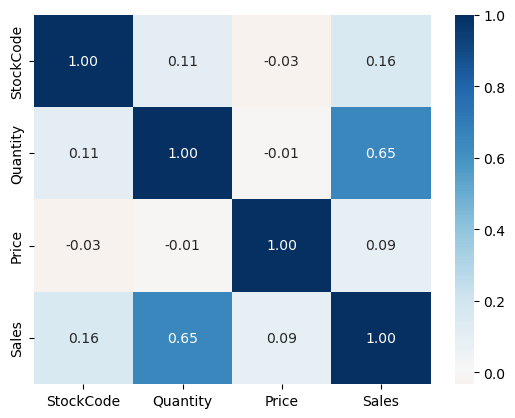

In [125]:
sns.heatmap(grouped_corr, annot=True, cmap='RdBu', fmt=".2f", center=0)
plt.show()

## RFM - Recency, Frequency, Monetary
Recency
* Median of 96 days, Average of 201 days
* skewed right

Frequency
* Median of 3 purchases, Average of 6 purchases
* strongly skewed right

Monetary
* Median Sales of 867.74, Average Sales of 2955.90
* strongly skewed right

Relationships
* -0.26 correlation between Recency and Frequency could indicate that some customers who buy more frequently tend to have purchased recently. But the weak correlation makes it not generalizable.
* 0.63 correlation between Monetary and Frequency indicates that more often they buy the more they spend.  Moderately strong so generaliable but not fully generalizable.

In [127]:
# Set reference date for frequency to one day after max date
max_date = has_id['InvoiceDate'].max()
reference_date = max_date + pd.Timedelta(days=1)
print(f"Reference Date: {reference_date}")

Reference Date: 2011-12-10 12:50:00


In [131]:
rfm = has_id.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                    # Frequency
    'Sales': 'sum'                                        # Monetary
}).reset_index()
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Sales': 'Monetary'
}, inplace=True)


In [133]:
rfm.describe()

,Recency,Frequency,Monetary
count,5878.0,5878.0,5878.0
mean,201.331915617557,6.289384144266758,2955.904052734375
std,209.33870672957246,13.009405882310057,14440.83984375
min,1.0,1.0,2.950000047683716
25%,26.0,1.0,342.27999114990234
50%,96.0,3.0,867.739990234375
75%,380.0,7.0,2248.3049926757812
max,739.0,398.0,580987.0625


#### Recency

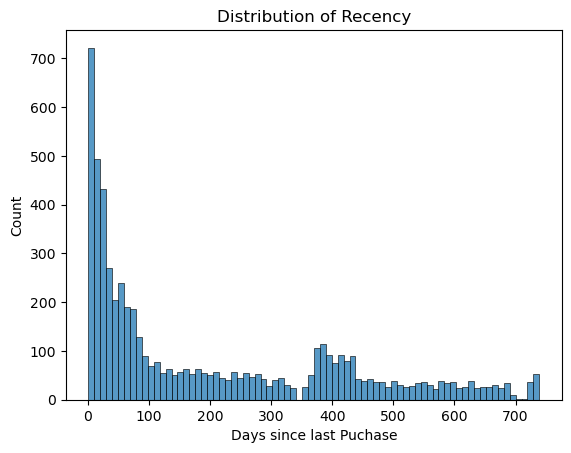

In [175]:
sns.histplot(rfm.Recency, bins=int(np.sqrt(len(rfm))))
plt.title('Distribution of Recency')
plt.xlabel('Days since last Puchase')

plt.show()

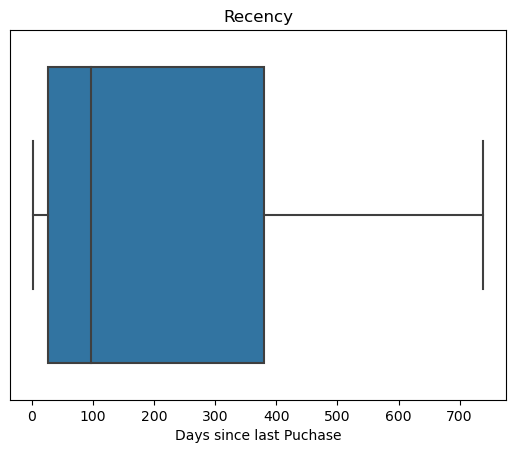

In [146]:
sns.boxplot(rfm.Recency, orient='h')
plt.yticks([])
plt.title('Recency')
plt.xlabel('Days since last Puchase')
plt.show()

#### Frequency

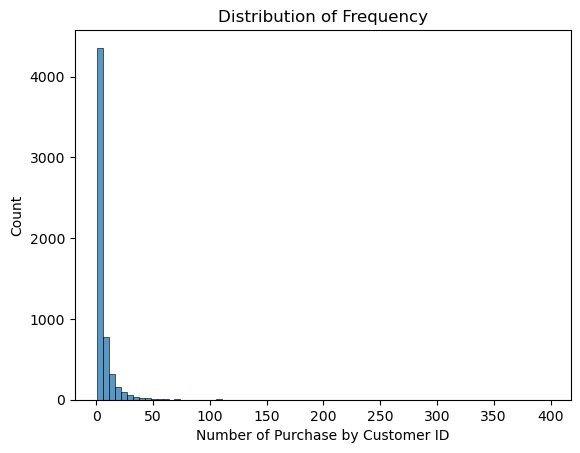

In [174]:
sns.histplot(rfm.Frequency, bins=int(np.sqrt(len(rfm))))
plt.title('Distribution of Frequency')
plt.xlabel('Number of Purchase by Customer ID')
plt.show()

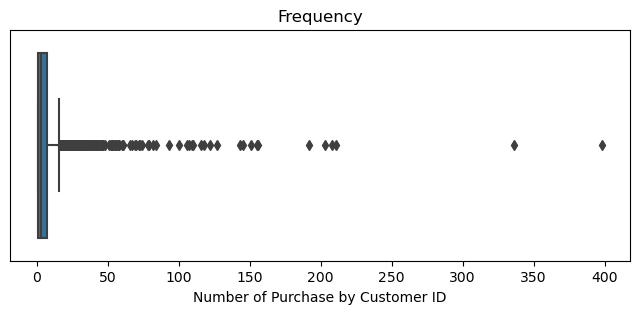

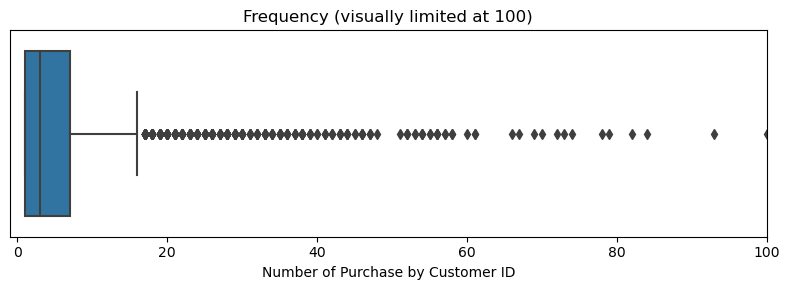

In [173]:
plt.figure(figsize=(8,3))
sns.boxplot(rfm.Frequency, orient='h')
plt.yticks([])
plt.title('Frequency')
plt.xlabel('Number of Purchase by Customer ID')

plt.figure(figsize=(8,3))
sns.boxplot(rfm.Frequency, orient='h')
plt.yticks([])
plt.xlim([-1,100])
plt.title('Frequency (visually limited at 100)')
plt.xlabel('Number of Purchase by Customer ID')
plt.tight_layout()
plt.show()

#### Monetary

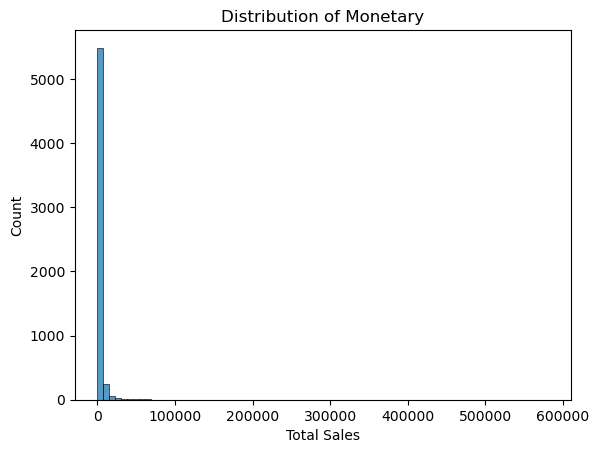

In [176]:
sns.histplot(rfm.Monetary, bins=int(np.sqrt(len(rfm))))
plt.title('Distribution of Monetary')
plt.xlabel('Total Sales')
plt.show()

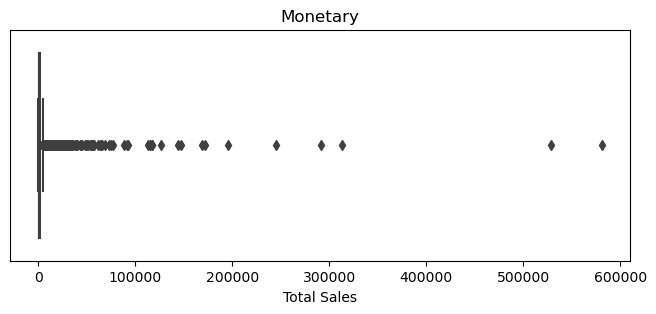

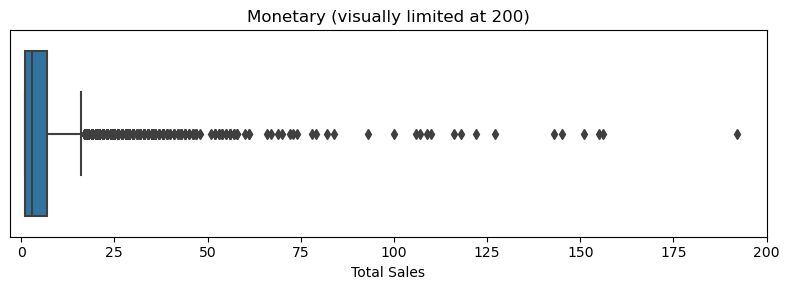

In [178]:
plt.figure(figsize=(8,3))
sns.boxplot(rfm.Monetary, orient='h')
plt.yticks([])
plt.title('Monetary')
plt.xlabel('Total Sales')

plt.figure(figsize=(8,3))
sns.boxplot(rfm.Frequency, orient='h')
plt.yticks([])
plt.xlim([-3,200])
plt.title('Monetary (visually limited at 200)')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

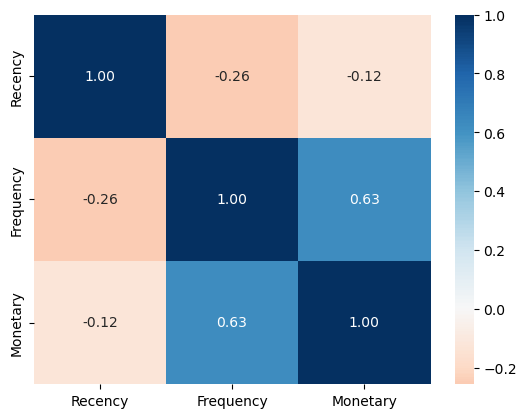

In [167]:
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']] .corr(), annot=True, cmap='RdBu', fmt=".2f", center=0)
plt.show()

/Users/ness/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


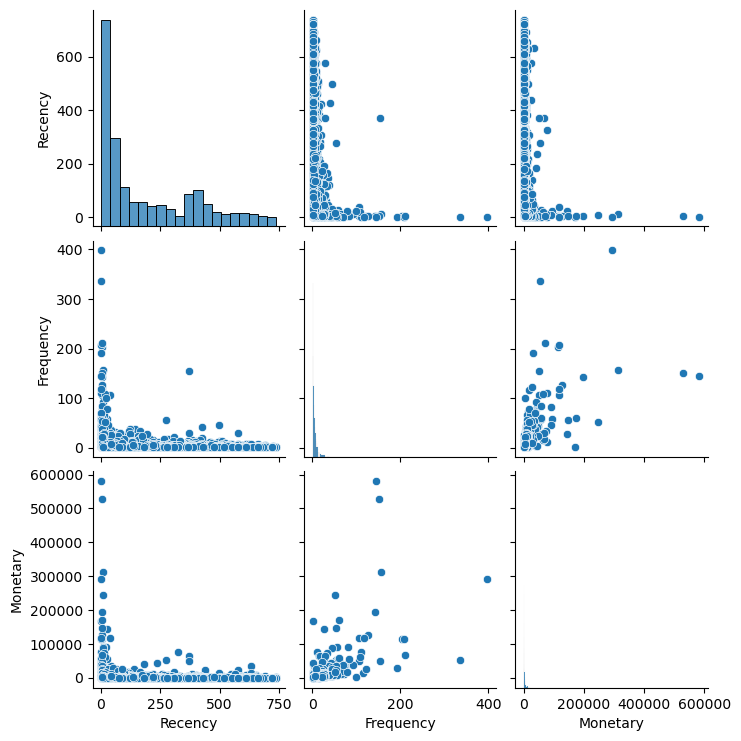

In [182]:
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary']])
plt.show()

## Export data for future use

In [189]:
# save has_id for known customers after dropping YearMonth
export_path_1 = '../Data/has_id.csv'
has_id.drop(columns='YearMonth').to_csv(export_path_1, index=False)

#save frm
export_path_2 = '../Data/rfm.csv'
rfm.to_csv(export_path_2, index=False)

In [190]:
# has_id.drop(columns='YearMonth')
# rfm